# Projetar a receita da empresa através da abertura de novas lojas.

In [1]:
!pip install mplcyberpunk

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

# Coletando dados
## Passo 1: Pegar os dados de lojas atuais
Os dados com as lojas da renner foram puxados no site da Renner https://lojasrenner.mzweb.com.br/info-aos-investidores/central-de-resultados/
na aba planilhas e fundamentos

In [3]:
nome_sheet = 'Lista de Lojas | Stores List'

planilha_renner = pd.read_excel("lojas_renner.xlsx", sheet_name = nome_sheet, skiprows = 5, 
                                usecols = ['Business', 'Country', 'UF', 'State', 'City',
                                           'Opening date', 'Shopping Mall / Street'])
planilha_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
0,Renner,2023-12-21 00:00:00,Uruguay,UY,Uruguay,Maldonado,Shopping Mall
1,Youcom,2023-11-30 00:00:00,Brazil,BA,Bahia,Salvador,Shopping Mall
2,Renner,2023-11-30 00:00:00,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
3,Youcom,2023-11-30 00:00:00,Brazil,BA,Bahia,Lauro de Freitas,Shopping Mall
4,Youcom,2023-11-23 00:00:00,Brazil,SP,São Paulo,São Paulo,Shopping Mall
...,...,...,...,...,...,...,...
775,Rio de Janeiro,41,4,57,NaN,NaN,NaN
776,São Paulo,119,48,209,NaN,NaN,NaN
777,Uruguay,11,0,11,NaN,NaN,NaN
778,Argentina,4,0,4,NaN,NaN,NaN


# Aqui ele pegou as ultimas linhas da tabela que é um outra tabela e deu uma bugada

In [4]:
planilha_renner = planilha_renner.dropna()
planilha_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
0,Renner,2023-12-21 00:00:00,Uruguay,UY,Uruguay,Maldonado,Shopping Mall
1,Youcom,2023-11-30 00:00:00,Brazil,BA,Bahia,Salvador,Shopping Mall
2,Renner,2023-11-30 00:00:00,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
3,Youcom,2023-11-30 00:00:00,Brazil,BA,Bahia,Lauro de Freitas,Shopping Mall
4,Youcom,2023-11-23 00:00:00,Brazil,SP,São Paulo,São Paulo,Shopping Mall
...,...,...,...,...,...,...,...
735,Renner,1980-09-01 00:00:00,Brazil,RS,Rio Grande do Sul,Santa Maria,Street
736,Renner,1977-11-01 00:00:00,Brazil,RS,Rio Grande do Sul,Porto Alegre,Street
737,Renner,1976-04-10 00:00:00,Brazil,RS,Rio Grande do Sul,Canoas,Shopping Mall
738,Renner,1970-12-04 00:00:00,Brazil,RS,Rio Grande do Sul,Porto Alegre,Shopping Mall


In [5]:
# Não quero analisar nem outras lojas da renner nem em outros paises 
# Vou filtrar para 	Business = renner e , country = br
# & cumpra as duas condições se quiser uma ou outra \
planilha_renner = planilha_renner[(planilha_renner["Business"] == "Renner") & (planilha_renner["Country"] == "Brazil")]  
planilha_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
2,Renner,2023-11-30 00:00:00,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
8,Renner,2023-11-09 00:00:00,Brazil,SP,São Paulo,São Paulo,Shopping Mall
10,Renner,2023-10-27 00:00:00,Brazil,RS,Rio Grande do Sul,Montenegro,Street
11,Renner,2023-10-17 00:00:00,Brazil,MG,Minas Gerais,Ituiutaba,Shopping Mall
12,Renner,2023-10-11 00:00:00,Brazil,SC,Santa Catarina,Videira,Shopping Mall
...,...,...,...,...,...,...,...
735,Renner,1980-09-01 00:00:00,Brazil,RS,Rio Grande do Sul,Santa Maria,Street
736,Renner,1977-11-01 00:00:00,Brazil,RS,Rio Grande do Sul,Porto Alegre,Street
737,Renner,1976-04-10 00:00:00,Brazil,RS,Rio Grande do Sul,Canoas,Shopping Mall
738,Renner,1970-12-04 00:00:00,Brazil,RS,Rio Grande do Sul,Porto Alegre,Shopping Mall


### O python leu Opening date como data mas é bom se prevenir e já converter a coluna em tipo data

In [6]:
planilha_renner["Opening date"] = pd.to_datetime(planilha_renner["Opening date"]).dt.date
planilha_renner

C:\Users\bruna\AppData\Local\Temp\ipykernel_19304\3706124718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planilha_renner["Opening date"] = pd.to_datetime(planilha_renner["Opening date"]).dt.date


,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
2,Renner,2023-11-30,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
8,Renner,2023-11-09,Brazil,SP,São Paulo,São Paulo,Shopping Mall
10,Renner,2023-10-27,Brazil,RS,Rio Grande do Sul,Montenegro,Street
11,Renner,2023-10-17,Brazil,MG,Minas Gerais,Ituiutaba,Shopping Mall
12,Renner,2023-10-11,Brazil,SC,Santa Catarina,Videira,Shopping Mall
...,...,...,...,...,...,...,...
735,Renner,1980-09-01,Brazil,RS,Rio Grande do Sul,Santa Maria,Street
736,Renner,1977-11-01,Brazil,RS,Rio Grande do Sul,Porto Alegre,Street
737,Renner,1976-04-10,Brazil,RS,Rio Grande do Sul,Canoas,Shopping Mall
738,Renner,1970-12-04,Brazil,RS,Rio Grande do Sul,Porto Alegre,Shopping Mall


# Passo 2: Pegar os dados dos municípios brasileiros.
Vamos no SIDRA, do IBGE.

https://sidra.ibge.gov.br/pesquisa/censo-demografico/demografico-2022/primeiros-resultados-populacao-e-domicilios


https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas

In [7]:
pib_cidades = pd.read_excel("pib_municipios.xlsx")
pop_municipios = pd.read_excel("populacao_municipios.xlsx")


pop_municipios

,City,pop
0,Alta Floresta D'Oeste (RO),21494
1,Ariquemes (RO),96833
2,Cabixi (RO),5351
3,Cacoal (RO),86887
4,Cerejeiras (RO),15890
...,...,...
5565,Vianópolis (GO),14956
5566,Vicentinópolis (GO),8768
5567,Vila Boa (GO),4215
5568,Vila Propício (GO),5815


In [8]:
pib_cidades

,City,pib
0,Alta Floresta D'Oeste (RO),734469
1,Ariquemes (RO),3209761
2,Cabixi (RO),238412
3,Cacoal (RO),2792383
4,Cerejeiras (RO),743037
...,...,...
5565,Vianópolis (GO),857968
5566,Vicentinópolis (GO),480173
5567,Vila Boa (GO),179899
5568,Vila Propício (GO),308013


# Agora vamos dar um MERGE entre as duas tabelas
A ideia é manter oq tem em comum e adicionar informações

In [9]:
dados_municipios = pib_cidades.merge(pop_municipios, on = "City" )
# O segundo argumento é basicamente a chave que usamos pra conectar nossas tabelas(Correspondencia entre as duas), tipo o que elas têm em comum.
dados_municipios

,City,pib,pop
0,Alta Floresta D'Oeste (RO),734469,21494
1,Ariquemes (RO),3209761,96833
2,Cabixi (RO),238412,5351
3,Cacoal (RO),2792383,86887
4,Cerejeiras (RO),743037,15890
...,...,...,...
5565,Vianópolis (GO),857968,14956
5566,Vicentinópolis (GO),480173,8768
5567,Vila Boa (GO),179899,4215
5568,Vila Propício (GO),308013,5815


In [10]:
dados_municipios["pib_per_capta"] = dados_municipios["pib"]/dados_municipios["pop"]
dados_municipios

,City,pib,pop,pib_per_capta
0,Alta Floresta D'Oeste (RO),734469,21494,34.170885
1,Ariquemes (RO),3209761,96833,33.147388
2,Cabixi (RO),238412,5351,44.554663
3,Cacoal (RO),2792383,86887,32.138099
4,Cerejeiras (RO),743037,15890,46.761296
...,...,...,...,...
5565,Vianópolis (GO),857968,14956,57.366141
5566,Vicentinópolis (GO),480173,8768,54.764256
5567,Vila Boa (GO),179899,4215,42.680664
5568,Vila Propício (GO),308013,5815,52.968702


In [11]:
dados_municipios[["City", "UF"]] = dados_municipios["City"].str.split("(", expand = True)
dados_municipios

,City,pib,pop,pib_per_capta,UF
0,Alta Floresta D'Oeste,734469,21494,34.170885,RO)
1,Ariquemes,3209761,96833,33.147388,RO)
2,Cabixi,238412,5351,44.554663,RO)
3,Cacoal,2792383,86887,32.138099,RO)
4,Cerejeiras,743037,15890,46.761296,RO)
...,...,...,...,...,...
5565,Vianópolis,857968,14956,57.366141,GO)
5566,Vicentinópolis,480173,8768,54.764256,GO)
5567,Vila Boa,179899,4215,42.680664,GO)
5568,Vila Propício,308013,5815,52.968702,GO)


In [12]:
dados_municipios["UF"] = dados_municipios["UF"].str.replace(")", "")
dados_municipios

,City,pib,pop,pib_per_capta,UF
0,Alta Floresta D'Oeste,734469,21494,34.170885,RO
1,Ariquemes,3209761,96833,33.147388,RO
2,Cabixi,238412,5351,44.554663,RO
3,Cacoal,2792383,86887,32.138099,RO
4,Cerejeiras,743037,15890,46.761296,RO
...,...,...,...,...,...
5565,Vianópolis,857968,14956,57.366141,GO
5566,Vicentinópolis,480173,8768,54.764256,GO
5567,Vila Boa,179899,4215,42.680664,GO
5568,Vila Propício,308013,5815,52.968702,GO


# Agora tratado as duas tabelas, podemos dar um merge entre elas
Lembrando que as duas tem UF e city em comum, e quando usamos merge a função pede como argumento por onde quero conectar as duas

Esse erro era esperado, sempre que vamos tratar ou dar merge em string é recomendado usar o strip
Quando tratamos string, sempre bom usar o método strip, assim tiramos espaços em branco

# Tratando strings com o método STRIP

In [13]:
dados_municipios

,City,pib,pop,pib_per_capta,UF
0,Alta Floresta D'Oeste,734469,21494,34.170885,RO
1,Ariquemes,3209761,96833,33.147388,RO
2,Cabixi,238412,5351,44.554663,RO
3,Cacoal,2792383,86887,32.138099,RO
4,Cerejeiras,743037,15890,46.761296,RO
...,...,...,...,...,...
5565,Vianópolis,857968,14956,57.366141,GO
5566,Vicentinópolis,480173,8768,54.764256,GO
5567,Vila Boa,179899,4215,42.680664,GO
5568,Vila Propício,308013,5815,52.968702,GO


In [14]:
dados_municipios["City"] = dados_municipios["City"].str.strip()
dados_municipios["UF"] = dados_municipios["UF"].str.strip()
planilha_renner["City"] = planilha_renner["City"].str.strip()
planilha_renner["UF"] = planilha_renner["UF"].str.strip()


dados_lojas_economia = dados_municipios.merge(planilha_renner, on = ["City", "UF"])

C:\Users\bruna\AppData\Local\Temp\ipykernel_19304\3182079774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planilha_renner["City"] = planilha_renner["City"].str.strip()
C:\Users\bruna\AppData\Local\Temp\ipykernel_19304\3182079774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planilha_renner["UF"] = planilha_renner["UF"].str.strip()


In [15]:
dados_lojas_economia = dados_municipios.merge(planilha_renner, on = ["City", "UF"])
dados_lojas_economia
# visualmente a tabela está igual, mas sem tirar os espaços em branco não conseguiria usar o merge

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,Cacoal,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,Porto Velho,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,Rio Branco,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
3,Manaus,103281436,2063689,50.046996,AM,Renner,2014-12-11,Brazil,Amazonas,Street
4,Manaus,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
422,Brasília,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
423,Brasília,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
424,Brasília,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
425,Brasília,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


# Análise exploratória

------------------------

## Observar as características atuais das lojas.
### % em shoppings
 Durante o processo de pesquisa de valuation ou projeção de uma empresa, é crucial adotar uma abordagem conservadora para evitar especulações infundadas. Por exemplo, consideremos a Renner, que atualmente possui 400 lojas. Seria imprudente projetar a abertura de 2000 lojas do nada, uma vez que isso seria uma conjectura excessivamente otimista e pouco fundamentada. Quando estamos em processo de valuation reserch ou projeção de uma empresa, quero ser o mais conservador possivel evitar "Viagem" a renner tem 400 lojas uma viagem seria projetar abertura de 2000 do nada, também não queremos presuir que a empresa vai mudar radicalmente o modelo de investimento

In [16]:
quantidade_lojas = len(dados_lojas_economia)

In [17]:
# o .size está calculando o tamanho de cada grupo formado
quantidade_por_tipo = dados_lojas_economia.groupby("Shopping Mall / Street")["Shopping Mall / Street"].size()
quantidade_por_tipo

Shopping Mall / Street
Shopping Mall    374
Street            53
Name: Shopping Mall / Street, dtype: int64

In [18]:
porcentagem_tipo = quantidade_por_tipo / quantidade_lojas
porcentagem_tipo

Shopping Mall / Street
Shopping Mall    0.875878
Street           0.124122
Name: Shopping Mall / Street, dtype: float64

### Os resultados da análise exploratória mostram que aproximadamente 87.6% das lojas estão localizadas em shoppings e 12.4% estão localizadas em ruas.

# Qual perfil de renda e população pra abrir uma loja Renner?
### Menor e maior cidade com uma Renner

In [20]:
dados_lojas_economia.sort_values("pop")

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
353,Garibaldi,2997963,34335,87.315072,RS,Renner,2021-04-15,Brazil,Rio Grande do Sul,Shopping Mall
354,Gramado,2658018,40134,66.228584,RS,Renner,2017-09-20,Brazil,Rio Grande do Sul,Street
389,Torres,1382097,41751,33.103327,RS,Renner,2021-10-23,Brazil,Rio Grande do Sul,Shopping Mall
340,Canela,1595255,48946,32.592142,RS,Renner,2023-08-03,Brazil,Rio Grande do Sul,Street
388,Taquara,1568872,53242,29.466812,RS,Renner,2023-08-31,Brazil,Rio Grande do Sul,Street
...,...,...,...,...,...,...,...,...,...,...
256,São Paulo,828980608,11451999,72.387415,SP,Renner,2016-10-11,Brazil,São Paulo,Shopping Mall
257,São Paulo,828980608,11451999,72.387415,SP,Renner,2016-04-28,Brazil,São Paulo,Shopping Mall
258,São Paulo,828980608,11451999,72.387415,SP,Renner,2015-11-11,Brazil,São Paulo,Street
251,São Paulo,828980608,11451999,72.387415,SP,Renner,2017-11-16,Brazil,São Paulo,Shopping Mall


## Renner menor e maior PIB per capita

In [21]:
dados_lojas_economia.sort_values("pib_per_capta")

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
416,Valparaíso de Goiás,2964512,198861,14.907458,GO,Renner,2015-11-27,Brazil,Goiás,Shopping Mall
52,Camaragibe,2229680,147771,15.088752,PE,Renner,2018-05-02,Brazil,Pernambuco,Shopping Mall
56,Paulista,5591652,342167,16.341880,PE,Renner,2016-04-26,Brazil,Pernambuco,Shopping Mall
55,Olinda,5788250,349976,16.538991,PE,Renner,2018-05-08,Brazil,Pernambuco,Shopping Mall
189,Carapicuíba,6854706,386984,17.713151,SP,Renner,2016-10-27,Brazil,São Paulo,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
175,Barueri,58027667,316473,183.357402,SP,Renner,2011-11-30,Brazil,São Paulo,Shopping Mall
176,Barueri,58027667,316473,183.357402,SP,Renner,2011-04-28,Brazil,São Paulo,Shopping Mall
18,Parauapebas,49763040,267836,185.796682,PA,Renner,2017-03-23,Brazil,Pará,Shopping Mall
181,Cajamar,22713160,92689,245.046985,SP,Renner,2023-08-09,Brazil,São Paulo,Shopping Mall


In [22]:
# Maricá é uma outliner por conta dos royalties do petroleo 

## 
Como é a distribuição das lojas abertas pela Renner em diferentes cidades brasileiras em relação ao PIB per capita? Há uma tendência de evitar cidades com menor renda média?
<br>
Pra visualizar esses dados, vamos igualar o perfil da amostra e retirar outliers
.

In [23]:
dados_cidades_grafico = dados_municipios[dados_municipios["pib_per_capta"] < 100 ]
dados_cidades_grafico = dados_cidades_grafico[dados_cidades_grafico["pop"] > 30000]
dados_lojas_economia_grafico = dados_lojas_economia[dados_lojas_economia["pib_per_capta"]< 100]

Gráfico time

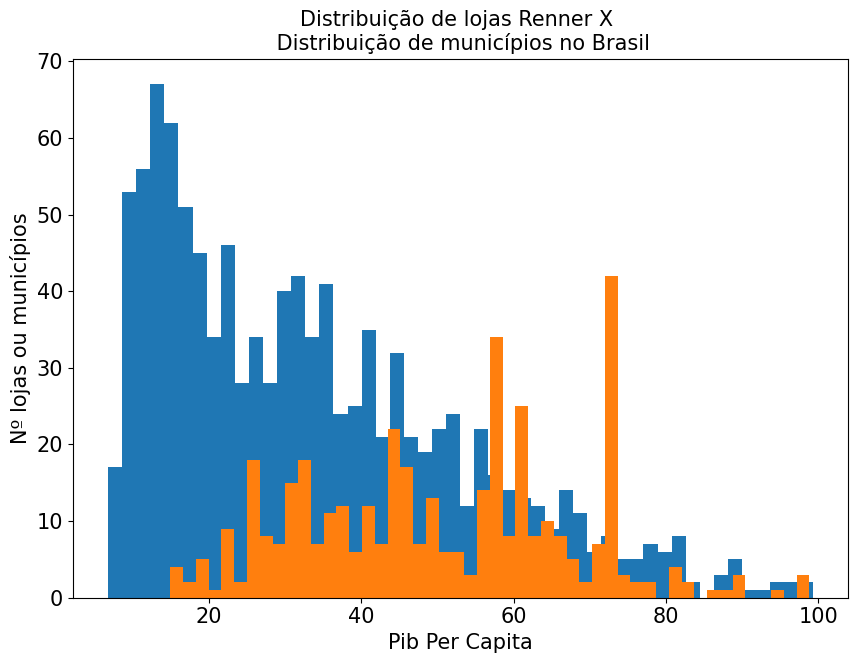

In [29]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(dados_cidades_grafico["pib_per_capta"], bins = 50)
ax.hist(dados_lojas_economia_grafico["pib_per_capta"], bins = 50)
plt.xlabel("Pib Per Capita", fontsize = 15)
plt.ylabel("Nº lojas ou municípios", fontsize = 15)
ax.tick_params(axis = "both", labelsize = 15)
plt.title("Distribuição de lojas Renner X \n Distribuição de municípios no Brasil", fontsize = 15)
ax.grid(False)
plt.show()

Relação entre a distribuição das lojas Renner e dos municípios
 - Eixo x pib per capita (Faixa de pibPC)
 - Eixo y - Quantidade lojas no laranja ou municipios no azul

A comparação entre as distribuições das lojas Renner e dos municípios mostra que há uma forte correlação positiva entre o PIB per capita e a presença de lojas Renner. Isso significa que, quanto maior o PIB per capita de um município, maior a probabilidade de haver uma loja Renner l

A distribuição das lojas Renner é altamente assimétrica, com a maioria das lojas concentradas em municípios com PIB per capita alto. Isso indica que a Renner se concentra em atender às necessidades de consumidores com maior poder aquisitivo.

A distribuição dos municípios também é assimétrica, mas com uma concentração maior em municípios com PIB per capita baixo. Isso indica que a maioria dos municípios brasileiros tem um PIB per capita baixo.    

Percebi que a maioria das lojas da Renner estão localizadas em shoppings, o que pode indicar uma relação, pois evita-se abrir lojas em locais onde a demanda não pode ser plenamente absorvida.á.

# Possibilidades 
* A Renner tem uma tendência de abrir suas lojas em shoppings.* 
A empresa não foca em cidades com menor renda per capita.

# Então existe uma preferencia por abrir lojas em shopping

## Pegar os dados faltantes para a projeção.¶
Associação de shoppings no Brasil
<br>
OBS: Tem shoppings que são grandes players e não estão na associação, mas isso vai entrar na nossa margem de erro da projeção, estamos subestimando esses players 
<br>
Utilizando web scraping, coletei dados sobre os maiores shoppings no site da Associação Brasileira de Shopping Centers (ABRASCE). Coletando informações como área construída, área total do terreno e outros detalhes relevantes.
<br>
https://abrasce.com.br/guia-de-shoppings/

In [31]:
dados_shopping = pd.read_csv("shoppings.csv")
dados_shopping

,Shopping,Area por m2,City,State
0,ÁGUAS CLARAS SHOPPING,12626,Brasília,DF
1,ÁGUAS LINDAS SHOPPING,67788,Águas Lindas de Goiás,GO
2,ALAMEDA JUIZ DE FORA,12437,Juiz de Fora,MG
3,ALAMEDA SHOPPING,4807,Brasília,DF
4,ALPHA SQUARE MALL,0,Barueri,SP
...,...,...,...,...
624,VILLAGIO MALL CENTER,5943,Bauru,SP
625,ASSIS PLAZA SHOPPING,1991,Assis,SP
626,MEGA MODA PARK,9920,Goiânia,GO
627,RIVIERA SHOPPING,37393,Bertioga,SP


In [33]:
dados_shopping["City"] = dados_shopping["City"].str.upper()
dados_shopping["City"] = dados_shopping["City"].str.strip()
dados_shopping

,Shopping,Area por m2,City,State
0,ÁGUAS CLARAS SHOPPING,12626,BRASÍLIA,DF
1,ÁGUAS LINDAS SHOPPING,67788,ÁGUAS LINDAS DE GOIÁS,GO
2,ALAMEDA JUIZ DE FORA,12437,JUIZ DE FORA,MG
3,ALAMEDA SHOPPING,4807,BRASÍLIA,DF
4,ALPHA SQUARE MALL,0,BARUERI,SP
...,...,...,...,...
624,VILLAGIO MALL CENTER,5943,BAURU,SP
625,ASSIS PLAZA SHOPPING,1991,ASSIS,SP
626,MEGA MODA PARK,9920,GOIÂNIA,GO
627,RIVIERA SHOPPING,37393,BERTIOGA,SP


# Projeção

* Pegar os dados de quantos shoppings existem em uma determinada cidade.
* Verificar o número de lojas da Renner presentes nessa cidade.
* Se houver menos lojas da Renner do que shoppings, considerar essa diferença como uma potencial abertura.
* Lojas de rua podem fazer com que essa estimativa seja menor do que o real.
* A análise das lojas de rua será realizada posteriormente.


In [37]:

shoppings_por_cidade = dados_shopping.groupby("City")["City"].size()
shoppings_por_cidade.sort_values()

City
ALEXÂNIA           1
MARICÁ             1
MAUÁ               1
MINEIROS           1
MOGI MIRIM         1
                  ..
PORTO ALEGRE      16
GOIÂNIA           19
BRASÍLIA          22
RIO DE JANEIRO    40
SÃO PAULO         56
Name: City, Length: 244, dtype: int64

In [39]:
dados_loja_shopping = dados_lojas_economia[dados_lojas_economia["Shopping Mall / Street"] == "Shopping Mall" ]
dados_loja_shopping["City"] = dados_loja_shopping["City"].str.upper()
dados_loja_shopping

C:\Users\bruna\AppData\Local\Temp\ipykernel_19304\2746625082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_loja_shopping["City"] = dados_loja_shopping["City"].str.upper()


,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,CACOAL,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,PORTO VELHO,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,RIO BRANCO,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
4,MANAUS,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
5,MANAUS,103281436,2063689,50.046996,AM,Renner,2014-11-27,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
422,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
423,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
424,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
425,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,Cacoal,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,Porto Velho,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,Rio Branco,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
3,Manaus,103281436,2063689,50.046996,AM,Renner,2014-12-11,Brazil,Amazonas,Street
4,Manaus,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
422,Brasília,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
423,Brasília,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
424,Brasília,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
425,Brasília,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


In [41]:
lojas_por_cidade = dados_loja_shopping.groupby("City")["City"].size()
lojas_por_cidade.sort_values()

City
ANANINDEUA         1
NOVA FRIBURGO      1
NOVO HAMBURGO      1
OLINDA             1
OURINHOS           1
                  ..
BELO HORIZONTE    10
PORTO ALEGRE      10
BRASÍLIA          10
RIO DE JANEIRO    21
SÃO PAULO         34
Name: City, Length: 189, dtype: int64

In [42]:
shoppings_por_cidade = shoppings_por_cidade.to_frame()
lojas_por_cidade = lojas_por_cidade.to_frame()

In [43]:
shoppings_por_cidade.columns = ["Quantidade_shoppings"]
lojas_por_cidade.columns = ["Quantidade_lojas"]

In [44]:
lojas_por_cidade

,Quantidade_lojas
City,
ANANINDEUA,1
ANGRA DOS REIS,1
ANÁPOLIS,1
APARECIDA DE GOIÂNIA,1
ARACAJU,3
...,...
VILA VELHA,3
VITÓRIA,1
VITÓRIA DA CONQUISTA,2


A operação df_lojas_x_shoppings = lojas_por_cidade.merge(shoppings_por_cidade, how="outer") combina todos os dados de lojas_por_cidade e shoppings_por_cidade em um único DataFrame, preservando todas as cidades presentes em ambos, mesmo que faltem dados em um dos lados.

No JOIN ele presume que os indices são iguais

In [47]:
df_lojas_x_shoppings = lojas_por_cidade.join(shoppings_por_cidade, how="outer")
df_lojas_x_shoppings

,Quantidade_lojas,Quantidade_shoppings
City,,
ALEXÂNIA,NaN,1.0
ALTAMIRA,NaN,1.0
ANANINDEUA,1.0,1.0
ANDRADINA,NaN,1.0
ANGRA DOS REIS,1.0,1.0
...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0
VOLTA REDONDA,2.0,2.0
VÁRZEA GRANDE,1.0,1.0


In [48]:
df_lojas_x_shoppings = df_lojas_x_shoppings.fillna(0)
df_lojas_x_shoppings

,Quantidade_lojas,Quantidade_shoppings
City,,
ALEXÂNIA,0.0,1.0
ALTAMIRA,0.0,1.0
ANANINDEUA,1.0,1.0
ANDRADINA,0.0,1.0
ANGRA DOS REIS,1.0,1.0
...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0
VOLTA REDONDA,2.0,2.0
VÁRZEA GRANDE,1.0,1.0


In [49]:
df_lojas_x_shoppings["Novas aberturas"] = df_lojas_x_shoppings["Quantidade_shoppings"] - df_lojas_x_shoppings["Quantidade_lojas"]

In [50]:
df_lojas_x_shoppings

,Quantidade_lojas,Quantidade_shoppings,Novas aberturas
City,,,
ALEXÂNIA,0.0,1.0,1.0
ALTAMIRA,0.0,1.0,1.0
ANANINDEUA,1.0,1.0,0.0
ANDRADINA,0.0,1.0,1.0
ANGRA DOS REIS,1.0,1.0,0.0
...,...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0,0.0
VOLTA REDONDA,2.0,2.0,0.0
VÁRZEA GRANDE,1.0,1.0,0.0


Se jogar um Sort_values veremos que temos valores negativos, porque temmos uma loja mas não tenho shopping, isso são lojas de ruas então pra somar a possibilidade de novas aberturas eu irei retirar valores negativos

In [51]:
df_lojas_x_shoppings = df_lojas_x_shoppings[df_lojas_x_shoppings["Novas aberturas"] != -1]
df_lojas_x_shoppings

,Quantidade_lojas,Quantidade_shoppings,Novas aberturas
City,,,
ALEXÂNIA,0.0,1.0,1.0
ALTAMIRA,0.0,1.0,1.0
ANANINDEUA,1.0,1.0,0.0
ANDRADINA,0.0,1.0,1.0
ANGRA DOS REIS,1.0,1.0,0.0
...,...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0,0.0
VOLTA REDONDA,2.0,2.0,0.0
VÁRZEA GRANDE,1.0,1.0,0.0


Tiramos 9 cidades que tem lojas de rua e não tem shopping

In [52]:
df_lojas_x_shoppings["Novas aberturas"].sum()

264.0

### Então existem 264 shoppings no país com potencial de abertura de uma nova loja Renner, que respeita lojas grandes e em cidades populosas, cidades que absorvem essa demanda 
A Renner pode emitir um guidance indicando suas expectativas de novas aberturas

# Lojas de rua?
Após a abertura de 264 possíveis shoppings, enfrentamos restrições quanto à expansão de investimentos em lojas de rua. Isso ocorre porque não podemos prever, ou não é o objetivo deste estudo prever, novas aberturas de shoppings.

In [54]:
lojas_totais = dados_lojas_economia.groupby("Shopping Mall / Street")["Shopping Mall / Street"].size()
lojas_totais

Shopping Mall / Street
Shopping Mall    374
Street            53
Name: Shopping Mall / Street, dtype: int64

In [55]:
lojas_totais["Shopping Mall"] = lojas_totais["Shopping Mall"] + df_lojas_x_shoppings["Novas aberturas"].sum()
lojas_totais

Shopping Mall / Street
Shopping Mall    638
Street            53
Name: Shopping Mall / Street, dtype: int64

In [58]:
lojas_rua_e_shopping = 638/0.875878
import math
resultado_arredondado = math.floor(lojas_rua_e_shopping)
resultado_arredondado

728

# Aqui seria o teto da nossa projeção dentro do que colocamos como regras, não sabemos as regras reais de abertura de novas lojas da renner
728
# Aberturas de rua

In [59]:
aberturas_rua = lojas_rua_e_shopping - lojas_totais["Shopping Mall"] - lojas_totais["Street"]
aberturas_rua

37.41194778268198

# Aberturas da Renner

* 264 Lojas em shoppings
* 37 lojas na rua
* 301 lojas no total!
* Não estamos considerando novos shoppings.
* Um aspecto importante é ver um teto claro pra Renner nesse perfil de shoppings que existe hoje.
* A renner abre aprox 25 lojas por ano.

# Usando uma tabela de valuation
<br>

* A renner costumava antes de pandemia abrir uma média de 25 lojas por ano

* Projetando abertura de 25 lojas por ano até 2035 teremos 300 novas lojas

* Então é factível 25 novas lojas por ano até 2035, a renner tem condições de manter essa taxa de abertura

* O guidance oficial da Renner é de novas 573 novas lojas até 2029

* Com uma receita liquida de R$ 31.543.741 em 2035

* Com a possibilidade da $LREN3 ter um TIR de 16,67 %

* Com um preço médio em 2035 da $LREN3 de 19,91 Reais, na última atualização do código dia 04/04/2024 está custando 17,06